In [ ]:
import pandas as pd
import numpy as np
import datetime
from time import strftime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/riset/dsp_pcrfquota_20200622.csv',sep=";", quotechar='"' )

In [ ]:
print("The shape of the DataFrame is => {}".format(df1.shape))

The shape of the DataFrame is => (1048573, 7)


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/riset/dsp_pcrfquota_20200629.csv',sep=";", quotechar='"' )

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/riset/dsp_pcrfquota_20200706.csv',sep=";", quotechar='"' )

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/riset/dsp_pcrfquota_20200713.csv',sep=";", quotechar='"' )

In [ ]:
df = pd.concat([df1, df2, df3, df4])

In [ ]:
print("The shape of the DataFrame is => {}".format(df.shape))

The shape of the DataFrame is => (4194292, 7)


Basic Data

In [ ]:
df.head()

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption,quotaintervaltype
0,X28111001XXX,Q_PT_200,NaN,NaN,512000,0,NaN
1,X28111001XXX,Q_VB_Post_Movie1,26214400.0,20.0,25809408,404992,NaN
2,X28111001XXX,Q_VBDPI_Post_MyMovie1,26214400.0,20.0,26210688,3712,NaN
3,X28111001XXX,Q_MKT2_100,NaN,NaN,204800,0,NaN
4,6281110018XX,Q_MKT2_100,NaN,NaN,204800,0,NaN


In [ ]:
df.drop(['quotaintervaltype'], axis=1, inplace=True)

In [ ]:
df.head()

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption
0,X28111001XXX,Q_PT_200,NaN,NaN,512000,0
1,X28111001XXX,Q_VB_Post_Movie1,26214400.0,20.0,25809408,404992
2,X28111001XXX,Q_VBDPI_Post_MyMovie1,26214400.0,20.0,26210688,3712
3,X28111001XXX,Q_MKT2_100,NaN,NaN,204800,0
4,6281110018XX,Q_MKT2_100,NaN,NaN,204800,0


In [ ]:
df = df.dropna()

In [ ]:
df.head()

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption
1,X28111001XXX,Q_VB_Post_Movie1,26214400.0,20.0,25809408,404992
2,X28111001XXX,Q_VBDPI_Post_MyMovie1,26214400.0,20.0,26210688,3712
5,6281110018XX,Q_VBDPI_Post_MyMovie1,10485760.0,20.0,10485760,0
7,6281110018XX,Q_VB4G_Post_Movie1,8388608.0,20.0,8388608,0
8,6281110018XX,Q_VB_Post_Movie1,2097152.0,20.0,2097152,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302341 entries, 1 to 1048564
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   msisdn         302341 non-null  object 
 1   quotaname      302341 non-null  object 
 2   quotavalue     302341 non-null  float64
 3   quotainterval  302341 non-null  float64
 4   balance        302341 non-null  int64  
 5   consumption    302341 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 16.1+ MB


In [ ]:
print("Unique Values in `balance` => {}".format(np.sort(df.quotavalue.unique())))

Unique Values in `balance` => [1.00000000e+00 3.07200000e+03 1.02400000e+04 2.04800000e+04
 2.56000000e+04 5.12000000e+04 1.02400000e+05 1.02470000e+05
 1.53600000e+05 2.04800000e+05 2.56000000e+05 3.07200000e+05
 5.12000000e+05 5.24289000e+05 6.14400000e+05 1.02400000e+06
 1.04857600e+06 1.57286400e+06 1.67772200e+06 1.88743700e+06
 2.08486400e+06 2.09715200e+06 2.09722200e+06 2.60915200e+06
 2.62144000e+06 3.14572800e+06 3.67001600e+06 4.19430400e+06
 5.24288000e+06 6.29145600e+06 8.38860800e+06 1.04857600e+07
 1.25829120e+07 1.25829820e+07 1.46800640e+07 1.57286400e+07
 1.67772160e+07 1.88743680e+07 2.09715200e+07 2.30686720e+07
 2.51658240e+07 2.62144000e+07 3.14572800e+07 3.35544320e+07
 3.67001600e+07 3.98458880e+07 4.19430400e+07 5.24288000e+07
 6.29145600e+07 7.34003200e+07 7.86432000e+07 8.38860800e+07
 8.91289600e+07 1.03809024e+08 1.04857600e+08 1.25829120e+08
 1.67772160e+08]


In [ ]:
print("The shape of the DataFrame is => {}".format(df.shape))

The shape of the DataFrame is => (302341, 6)


In [ ]:
df['quotavalue'] = df['quotavalue'].astype('int64')
df['quotainterval'] = df['quotainterval'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302341 entries, 1 to 1048564
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   msisdn         302341 non-null  object
 1   quotaname      302341 non-null  object
 2   quotavalue     302341 non-null  int64 
 3   quotainterval  302341 non-null  int64 
 4   balance        302341 non-null  int64 
 5   consumption    302341 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.1+ MB


In [ ]:
df.describe()

,quotavalue,quotainterval,balance,consumption
count,3.023410e+05,302341.000000,3.023410e+05,3.023410e+05
mean,9.861835e+06,10.687611,8.200151e+06,1.617219e+06
std,1.070176e+07,7.181536,1.042170e+07,3.675822e+06
min,1.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,3.145728e+06,6.000000,1.676416e+06,0.000000e+00
50%,8.388608e+06,11.000000,4.242486e+06,4.838400e+04
75%,1.258291e+07,20.000000,1.048576e+07,1.353216e+06
max,1.677722e+08,90.000000,1.677702e+08,1.258294e+08


In [ ]:
df['sum']=df['quotavalue']-df['consumption']
# df['sum']=df['sum']<0 * -1
# df['sum']=abs(df['sum'])

df.sample(n=10)

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption,sum
1032552,62X111X7077XX,888,12582912,1,12582889,23,12582889
85521,X2811993X8XX,888,12582912,20,0,12582929,-17
1018462,6X8X1XX06X8XX,Q_VBDPI_Post_MyMovie1,16777216,20,16674688,102528,16674688
1034643,62811119X3XX,Q_VBDPI_Post_MyMovie1,5242880,11,5120768,122112,5120768
430328,62812971706XX,Q_VBDPI_Post_MyMovie1,5242880,11,5165952,76928,5165952
516063,628131811XXXX,Q_VBDPI_Post_MyMovie1,16777216,20,16578048,199168,16578048
480190,628111133XX,Q_VB4G_Post_Movie1,12582912,6,12544384,38528,12544384
847484,X2821112838XX,Q_VB4G_Post_Movie1,12582912,20,5763968,6818944,5763968
955231,6281181X1XXX,Q_VB4G_Post_Movie2,4194304,11,0,4194688,-384
477572,62X1110972XX,Q_VB_post_EKRC,20971520,1,13609896,7361624,13609896


In [ ]:
df['status']=df['balance']==df['sum']
df.sample(n=15)

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption,sum,status
245066,6281210222XX,Q_Pos_MyPlan100K_GOLD_Data,2097152,1,2097152,0,2097152,True
876785,X28119432XXX,Q_VB_Post_Movie1,1048576,11,1048576,0,1048576,True
883859,62X12136125XX,Q_VB4G_Post_Movie1,12582912,1,0,12583040,-128,False
83328,628118339XX,Q_VB_Post_Movie1,10485760,1,10485760,0,10485760,True
573379,X281281X1X0XX,Q_VB4G_Post_FreeQuotaUtil,5242880,6,0,5242881,-1,False
236791,62852881X8XXX,Q_VB4G_Post_Movie1,12582912,11,0,12583040,-128,False
402934,6281199893XX,Q_VB4G_Post_Movie1,4194304,11,983168,3211136,983168,True
949309,6282299X678XX,Q_VBDPI_Post_MyMovie1,10485760,11,10370688,115072,10370688,True
102189,62812880447XX,Q_VB4G_Post_Movie1,12582912,20,10279168,2303744,10279168,True
419380,62X12X4X2X2XX,Q_VBDPI_Post_MyMovie1,15728640,11,15717888,10752,15717888,True


In [ ]:
df['status'] = df['status'].replace({True: 'Normal', False: 'Fraud'})
df.tail()

,msisdn,quotaname,quotavalue,quotainterval,balance,consumption,sum,status
1048553,6X81XX9544XX,Q_VB_Post_Movie2,4194304,11,4194304,0,4194304,Normal
1048554,6X81XX9544XX,Q_VB4G_Post_Movie2,12582912,11,12582912,0,12582912,Normal
1048560,62812296XXXX,Q_VB_Post_Movie1,4194304,6,4194304,0,4194304,Normal
1048562,62812296XXXX,Q_VBDPI_Post_MyMovie1,16777216,6,16646912,130304,16646912,Normal
1048564,62812296XXXX,Q_VB4G_Post_Movie1,12582912,6,9506304,3076608,9506304,Normal


In [ ]:
df.status.unique()

array(['Normal', 'Fraud'], dtype=object)

EDA

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


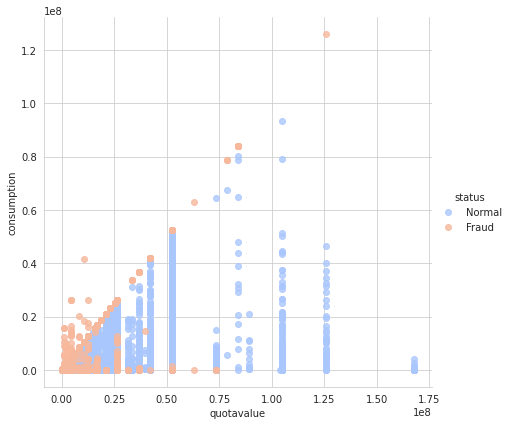

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('quotavalue','consumption',data=df, hue='status',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


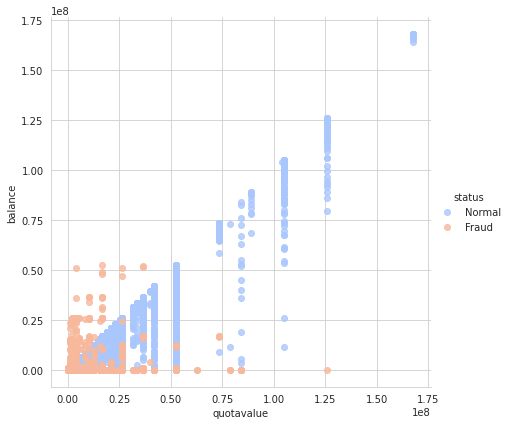

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('quotavalue','balance',data=df, hue='status',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


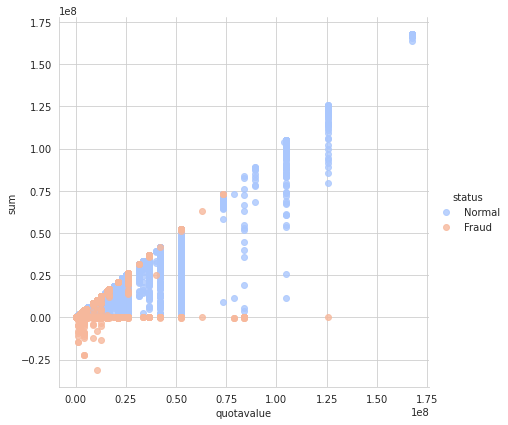

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('quotavalue','sum',data=df, hue='status',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


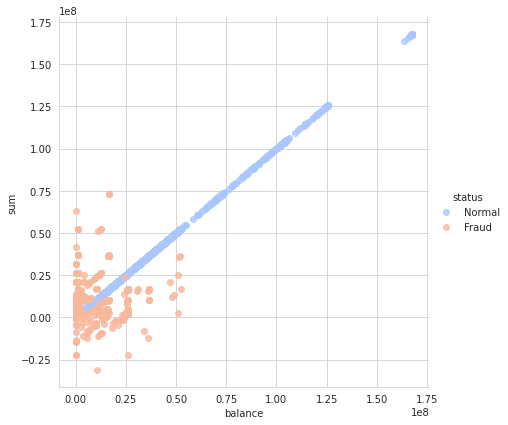

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('balance','sum',data=df, hue='status',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


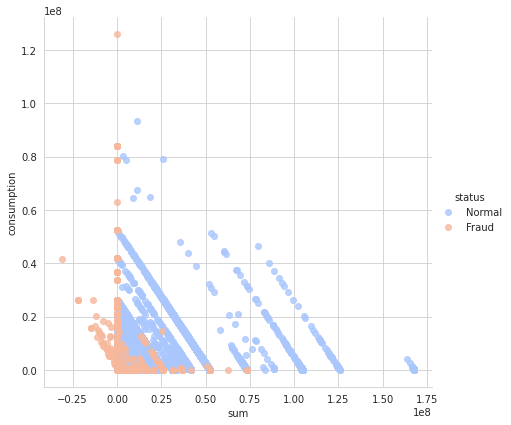

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('sum','consumption',data=df, hue='status',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


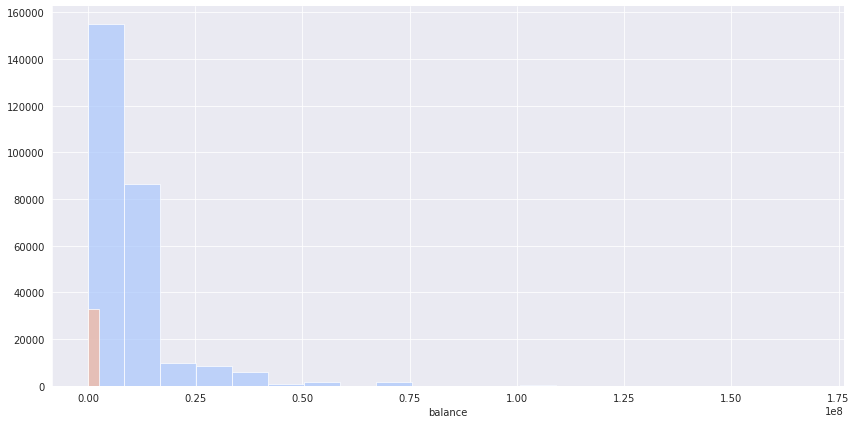

In [ ]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="status",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'balance',bins=20,alpha=0.7)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


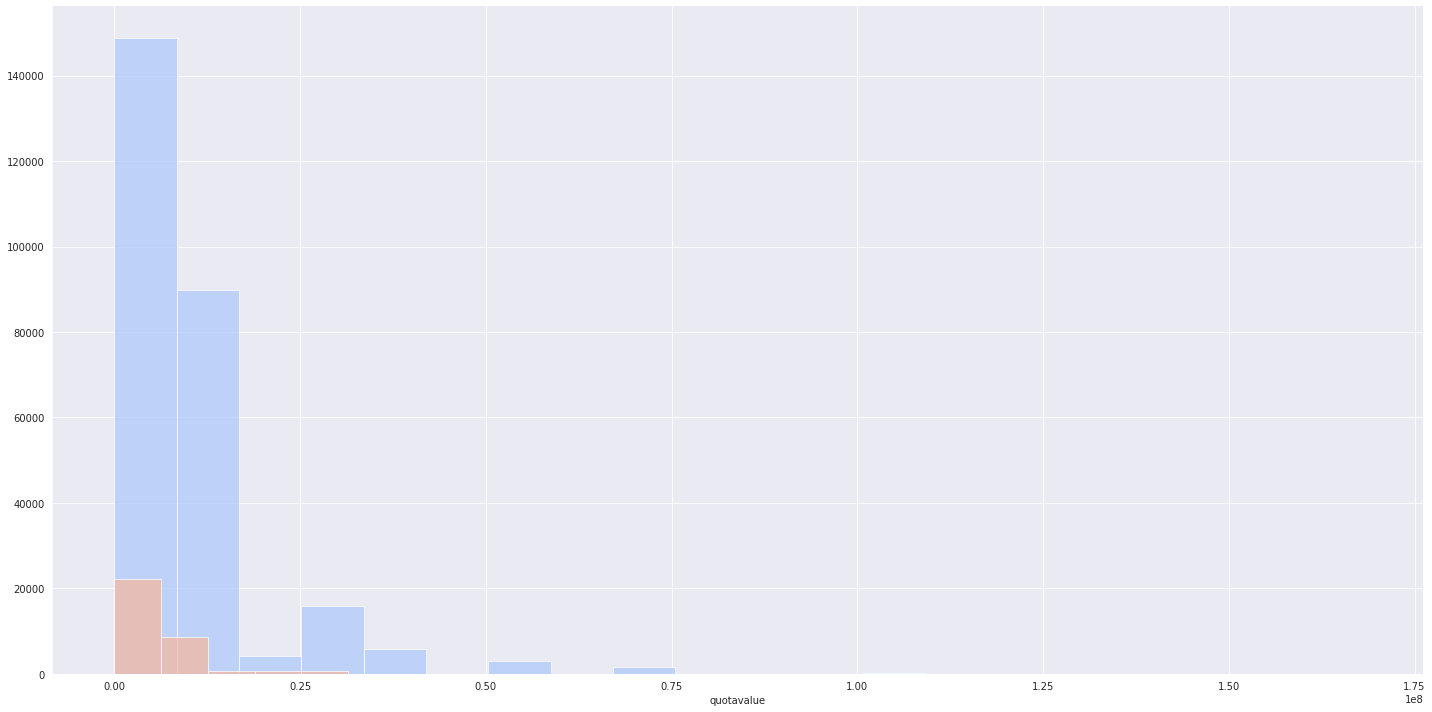

In [ ]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="status",palette='coolwarm',size=10,aspect=2)
g = g.map(plt.hist,'quotavalue',bins=20,alpha=0.7)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


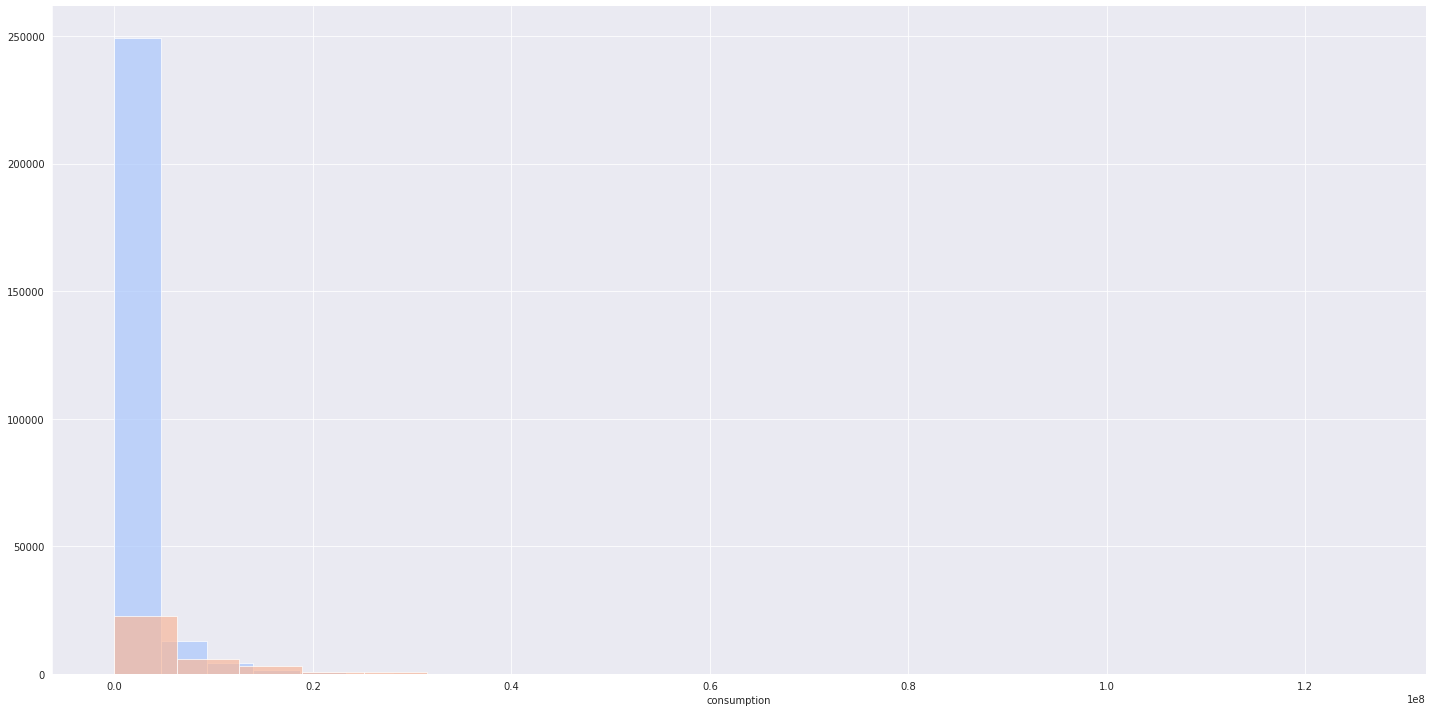

In [ ]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="status",palette='coolwarm',size=10,aspect=2)
g = g.map(plt.hist,'consumption',bins=20,alpha=0.7)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


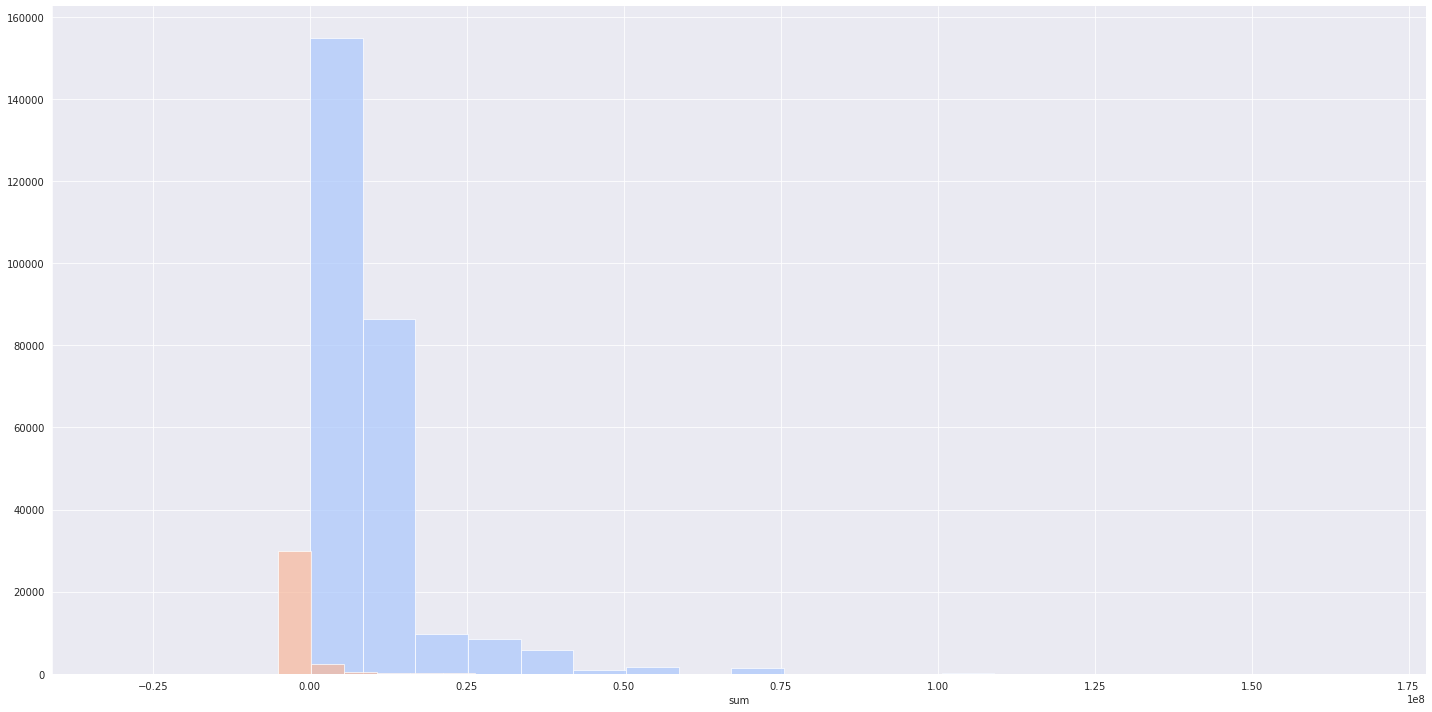

In [ ]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="status",palette='coolwarm',size=10,aspect=2)
g = g.map(plt.hist,'sum',bins=20,alpha=0.7)

K-Means Cluster

In [ ]:
!pip3 install KMeans

  Created wheel for KMeans: filename=kmeans-1.0.2-cp36-cp36m-linux_x86_64.whl size=11759 sha256=94f857852ba4b5174b4fa9c606564292f076cb5f25f1d62bef292b2ff0e50608
  Stored in directory: /root/.cache/pip/wheels/10/05/77/2735fd2f7a0b4d86cb7a83be2a56807cf706d5d27f742c6482
Successfully built KMeans


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
means = KMeans(n_clusters=2)

In [ ]:
#silhouette score kmeans

In [ ]:
df_coba = df.drop(['msisdn'], axis=1, inplace=True)
df_coba = df.drop(['quotaname'], axis=1, inplace=True)

In [ ]:
df.head()

,quotavalue,quotainterval,balance,consumption,sum,status
1,26214400,20,25809408,404992,25809408,Normal
2,26214400,20,26210688,3712,26210688,Normal
5,10485760,20,10485760,0,10485760,Normal
7,8388608,20,8388608,0,8388608,Normal
8,2097152,20,2097152,0,2097152,Normal


In [ ]:
means.fit(df.drop('status',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
means.cluster_centers_

array([[6.13287528e+06, 1.07304087e+01, 4.43124528e+06, 1.65861509e+06,
        4.47426019e+06],
       [2.52025377e+07, 1.05115441e+01, 2.37051898e+07, 1.44691586e+06,
        2.37556219e+07]])

In [ ]:
(means.labels_)

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

Evaluation

In [ ]:
def converter(cluster):
    if cluster=='Fraud':
        return 1
    else:
        return 0

In [ ]:
df['Cluster'] = df['status'].apply(converter)

In [ ]:
df.sample(n=10)

,quotavalue,quotainterval,balance,consumption,sum,status,Cluster
954827,153600,20,152944,656,152944,Normal,0
19883,36700160,11,36609664,90496,36609664,Normal,0
879422,2097152,6,2097152,0,2097152,Normal,0
722186,10485760,11,10324992,160768,10324992,Normal,0
427608,10485760,1,5661568,4824192,5661568,Normal,0
692251,10485760,11,5081404,5404356,5081404,Normal,0
820595,3145728,1,2684179,461549,2684179,Normal,0
45851,1048576,11,792677,255899,792677,Normal,0
107390,16777216,20,15243904,1533312,15243904,Normal,0
49607,10485760,1,10137472,348288,10137472,Normal,0


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],means.labels_))
print(classification_report(df['Cluster'],means.labels_))

[[210506  58876]
 [ 32730    229]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82    269382
           1       0.00      0.01      0.00     32959

    accuracy                           0.70    302341
   macro avg       0.43      0.39      0.41    302341
weighted avg       0.77      0.70      0.73    302341



Silhouette Analysis

Automatically created module for IPython interactive environment


KeyboardInterrupt: ignored

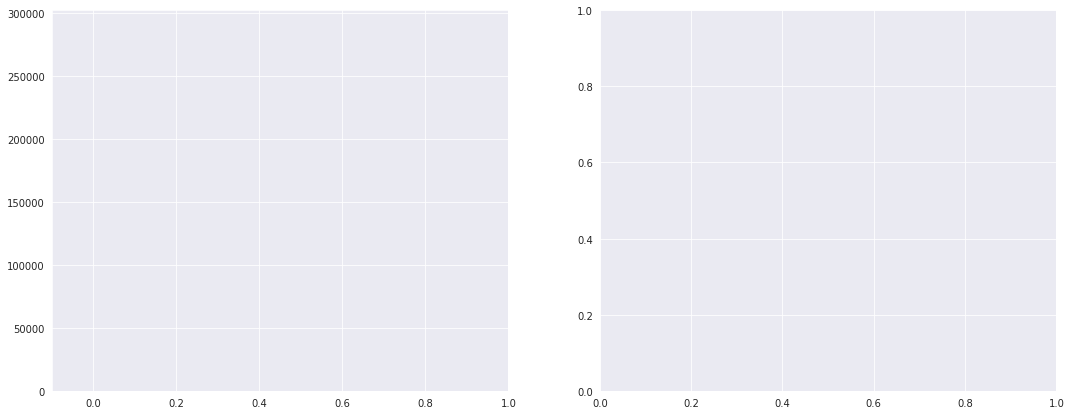

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm


print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df.drop('status',axis=1)) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df.drop('status',axis=1))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df.drop('status',axis=1), cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df.drop('status',axis=1), cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    dz = df.drop('status',axis=1)
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dz.iloc[:, 0], dz.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()